In [1]:
import os
import dynamic_sound as ds
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import librosa
import IPython.display as ipd
import numpy as np
import pyroomacoustics as pra

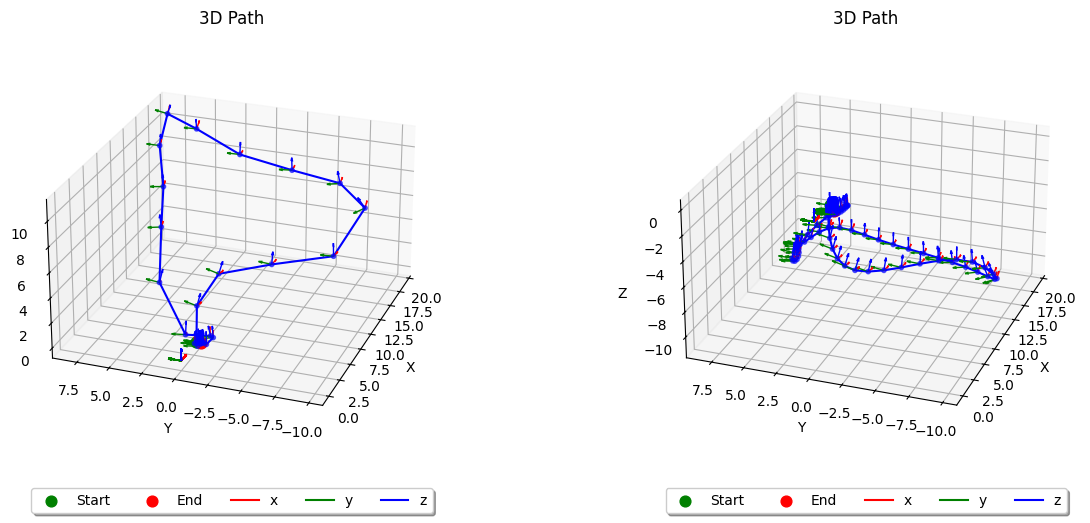

In [ ]:
src_folder = r"airsim/data/run1/converted"
drone_path = ds.Path(file=os.path.join(src_folder, "drone_path.csv"))
microphone_path = ds.Path(file=os.path.join(src_folder, "camera_path.csv"))
drone_sound = r"../tests/resources/sounds/flying_drone.wav"

# path interpolation
fig = plt.figure(figsize=(15, 10))
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')
drone_path.plot_path_3d(show=False, ax=ax1)
drone_path.plot_quaternion_directions(scale=1.0, show=False, ax=ax1, legend=False)
microphone_path.plot_quaternion_directions(scale=1.0, show=False, ax=ax1)
drone_path.interpolate_path(100)
drone_path.plot_path_3d(show=False, ax=ax2)
drone_path.plot_quaternion_directions(scale=1.0, show=False, ax=ax2, legend=False)
microphone_path.plot_quaternion_directions(scale=1.0, show=False, ax=ax2)
ax1.view_init(elev=25, azim=-160)
ax2.view_init(elev=25, azim=-160)
ax1.set_aspect('equal')
ax2.set_aspect('equal')
plt.show()

In [17]:
source_path = ds.Path([
    [0.0,  3, 200,  1,   1, 0, 0, 0],
    [8.0,  3, -200, 1,   1, 0, 0, 0]
])
reflection_path = ds.Path([
    [0.0,  3, 200,  -1,   1, 0, 0, 0],
    [8.0,  3, -200, -1,   1, 0, 0, 0]
])
microphone_path = ds.Path([
    [0.0,  0, 0, 1,   1, 0, 0, 0],
    [8.0,  0, 0, 1,   1, 0, 0, 0]
])

# simulation environment
sim = ds.Simulation(
    temperature=20,
    pressure=1,
    relative_humidity=50
)

# microphone
mic_sample_rate = 24_000
microphone = ds.microphones.Microphone("_tmp/simulation_sound.wav", sample_rate=mic_sample_rate)
sim.add_microphone(path=microphone_path, microphone=microphone)

# source
#source = ds.sources.SineWave(2_000, amplitude=1.0)
source = ds.sources.WhiteNoise(duration=10.0, sample_rate=24_000, amplitude=1.0)
sim.add_source(
    path=source_path,
    source=source
)

# reflection
sim.add_source(
    path=reflection_path,
    source=source
)

sim.run()

100%|██████████| 384000/384000 [05:47<00:00, 1104.88it/s]


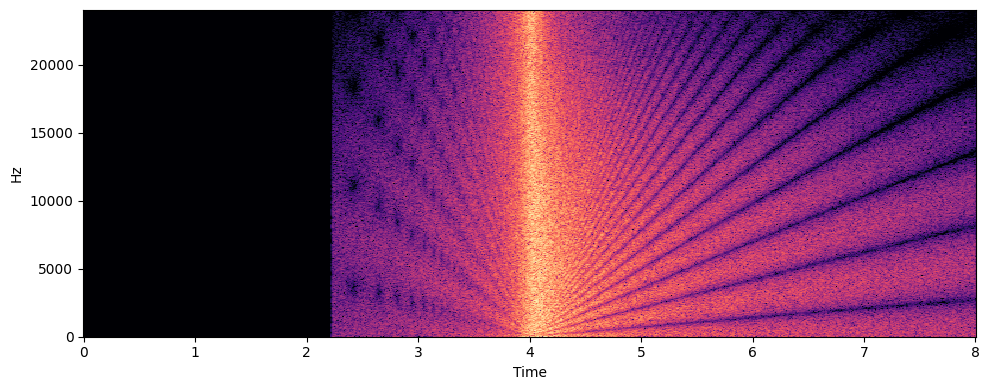

In [18]:
signal, sr = librosa.load("_tmp/simulation_sound.wav", sr=None, mono=False)

if signal.ndim == 1:  # if single channel reshape to a common format (n_channels, n_samples)
    signal = signal.reshape(1, -1)
    
ipd.display(ipd.Audio(signal[0], rate=sr))

D = librosa.stft(signal[0])
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

plt.figure(figsize=(10, 4))
librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='hz')
#plt.colorbar(format='%+2.0f dB')
#plt.title('Spectrogram')
plt.tight_layout()
plt.show()